In [146]:
# Import necessary libraries
import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import seaborn as sns  # For visualizations
import matplotlib.pyplot as plt  # For visualizations

# Machine Learning-related imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

In [147]:
# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
submission_df = pd.read_csv('sample_submission.csv')

In [148]:
# Check the shape and structure of each dataset
print(train_df.shape)  # Dimensions of training data
print(test_df.shape)   # Dimensions of testing data
print(submission_df.shape)  # Dimensions of sample submission file

# Display the first few rows of each dataset to understand the structure
print(train_df.head())  
print(test_df.head())  
print(submission_df.head())

(58645, 13)
(39098, 12)
(39098, 2)
   id  person_age  person_income person_home_ownership  person_emp_length  \
0   0          37          35000                  RENT                0.0   
1   1          22          56000                   OWN                6.0   
2   2          29          28800                   OWN                8.0   
3   3          30          70000                  RENT               14.0   
4   4          22          60000                  RENT                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0   EDUCATION          B       6000          11.49                 0.17   
1     MEDICAL          C       4000          13.35                 0.07   
2    PERSONAL          A       6000           8.90                 0.21   
3     VENTURE          B      12000          11.11                 0.17   
4     MEDICAL          A       6000           6.92                 0.10   

  cb_person_default_on_file  cb_person_cred_hist_le

In [149]:
train_df.shape

(58645, 13)

In [150]:
test_df.shape

(39098, 12)

In [151]:
submission_df.shape

(39098, 2)

In [152]:
train_df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [153]:
test_df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [154]:
submission_df.head()

,id,loan_status
0,58645,0.5
1,58646,0.5
2,58647,0.5
3,58648,0.5
4,58649,0.5


In [155]:
# List numerical columns in both training and test sets
print("Numerical columns in training set:", train_df.select_dtypes(include=['int64', 'float64']).columns)
print("Numerical columns in test set:", test_df.select_dtypes(include=['int64', 'float64']).columns)

Numerical columns in training set: Index(['id', 'person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'loan_status'],
      dtype='object')
Numerical columns in test set: Index(['id', 'person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')


# Exploratory Data Analysis

In [156]:
# Check for missing values in training and testing datasets
print(train_df.isnull().sum())
print(test_df.isnull().sum())

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64
id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


In [157]:
print(train_df.columns)  # Check column names in training data

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')


# Examine the target variable distribution:

In [158]:
# Check the distribution of Loan_Status in the full dataset
print("Distribution of Loan_Status in full dataset:")
print(train_df['loan_status'].value_counts())

Distribution of Loan_Status in full dataset:
loan_status
0    50295
1     8350
Name: count, dtype: int64


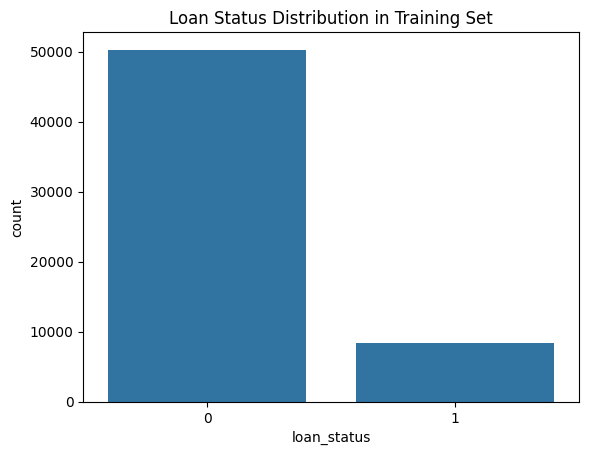

In [159]:
# Plot the distribution of the target variable in the training set
sns.countplot(x='loan_status', data=train_df)
plt.title('Loan Status Distribution in Training Set')
plt.show()

# c. Visualize relationships between features and target

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


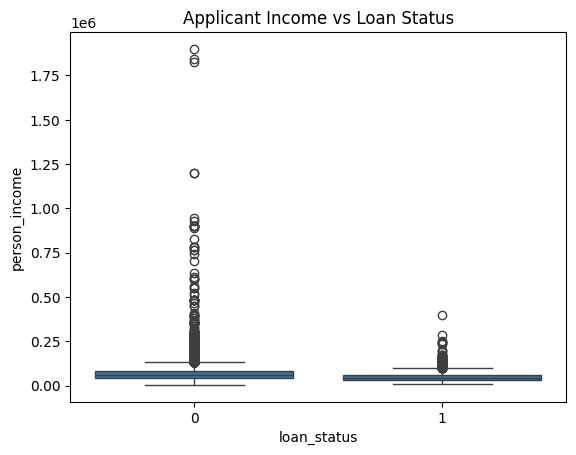

In [160]:
# Visualize relationships between numerical features and loan_status
# Example: Plot applicant income vs loan status
sns.boxplot(x='loan_status', y='person_income', data=train_df)
plt.title('Applicant Income vs Loan Status')
plt.show()

# Preprocessing

# a. Encode categorical variables:

In [161]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Get the list of categorical columns
categorical_cols = train_df.select_dtypes(include=['object']).columns

# Label encode binary columns and One-Hot encode multi-class columns
le = LabelEncoder()

for col in categorical_cols:
    if train_df[col].nunique() == 2:  # If binary categorical
        train_df[col] = le.fit_transform(train_df[col])
    else:  # For multi-class categorical, use One-Hot Encoding
        train_df = pd.get_dummies(train_df, columns=[col], drop_first=True)

print("Encoded Data Sample:")
print(train_df.head())

Encoded Data Sample:
   id  person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0   0          37          35000                0.0       6000          11.49   
1   1          22          56000                6.0       4000          13.35   
2   2          29          28800                8.0       6000           8.90   
3   3          30          70000               14.0      12000          11.11   
4   4          22          60000                2.0       6000           6.92   

   loan_percent_income  cb_person_default_on_file  cb_person_cred_hist_length  \
0                 0.17                          0                          14   
1                 0.07                          0                           2   
2                 0.21                          0                          10   
3                 0.17                          0                           5   
4                 0.10                          0                           3   

   lo

In [162]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns, excluding 'Loan_Status'
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = numerical_cols.drop('loan_status', errors='ignore')  # Exclude the target column

# Initialize the scaler
scaler = StandardScaler()

# Scale numerical columns (excluding 'Loan_Status')
train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])

In [163]:
train_df[numerical_cols]

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,-1.732021,1.566200,-0.765768,-1.187200,-0.578306,0.267616,0.117378,2.031798
1,-1.731962,-0.920057,-0.212128,0.328047,-0.937775,0.880532,-0.973242,-0.946489
2,-1.731903,0.240196,-0.929223,0.833130,-0.578306,-0.585854,0.553626,1.039036
3,-1.731844,0.405947,0.156966,2.348377,0.500101,0.142396,0.117378,-0.201917
4,-1.731785,-0.920057,-0.106673,-0.682117,-0.578306,-1.238314,-0.646056,-0.698298
...,...,...,...,...,...,...,...,...
58640,1.731785,1.068949,1.475156,0.075506,2.836651,1.737297,0.553626,1.039036
58641,1.731844,0.074446,-0.929223,-1.187200,0.140632,0.676227,2.080493,0.542655
58642,1.731903,-0.754307,-0.528494,0.580588,-0.434518,1.753773,-0.100746,-0.946489
58643,1.731962,-0.920057,-0.897587,-0.682117,-0.758041,-0.585854,0.117378,-0.698298


In [164]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y), excluding 'Loan_Status' from X
X = train_df.drop(columns=['loan_status'])  # Features
y = train_df['loan_status']  # Target

# Perform stratified split to maintain class distribution
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check class distribution in the training set
print("Class distribution in y_train after stratified split:")
print(y_train.value_counts())


Class distribution in y_train after stratified split:
loan_status
0    40236
1     6680
Name: count, dtype: int64


# Stratify

In [165]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y), excluding 'Loan_Status' from X
X = train_df.drop(columns=['loan_status'])  # Features
y = train_df['loan_status']  # Target

# Perform stratified split to maintain class distribution
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check class distribution in the training set
print("Class distribution in y_train after stratified split:")
print(y_train.value_counts())


Class distribution in y_train after stratified split:
loan_status
0    40236
1     6680
Name: count, dtype: int64


# Apply SMOTE to Handle Data Imbalance

In [166]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data to balance the classes
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
print("Class distribution in y_train after SMOTE:")
print(y_train_sm.value_counts())


Class distribution in y_train after SMOTE:
loan_status
0    40236
1    40236
Name: count, dtype: int64


# Logistics Regression Model

In [167]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train_sm, y_train_sm)

# Make predictions on the validation set
y_val_pred = logreg.predict(X_val)
y_val_prob = logreg.predict_proba(X_val)[:, 1]  # Probabilities for ROC AUC

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [168]:
# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_prob)

print(f"Validation Accuracy: {accuracy:.4f}")
print(f"Validation ROC AUC: {roc_auc:.4f}")

# Display detailed classification report
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))

Validation Accuracy: 0.8467
Validation ROC AUC: 0.9016

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.85      0.90     10059
           1       0.48      0.82      0.60      1670

    accuracy                           0.85     11729
   macro avg       0.72      0.84      0.75     11729
weighted avg       0.90      0.85      0.86     11729



# RandomForest Model

In [169]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Initialize the RandomForest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # You can tune 'n_estimators' if needed

# Train the RandomForest model
rf.fit(X_train_sm, y_train_sm)

# Make predictions on the validation set
y_val_pred = rf.predict(X_val)
y_val_prob = rf.predict_proba(X_val)[:, 1]  # Get probabilities for ROC AUC

In [173]:
# Evaluate the RandomForest model
accuracy = accuracy_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_prob)

print(f"Validation Accuracy: {accuracy:.4f}")
print(f"Validation ROC AUC: {roc_auc:.4f}")

# Display detailed classification report
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))

Validation Accuracy: 0.9445
Validation ROC AUC: 0.9325

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     10059
           1       0.86      0.73      0.79      1670

    accuracy                           0.94     11729
   macro avg       0.91      0.86      0.88     11729
weighted avg       0.94      0.94      0.94     11729



# Features Importance

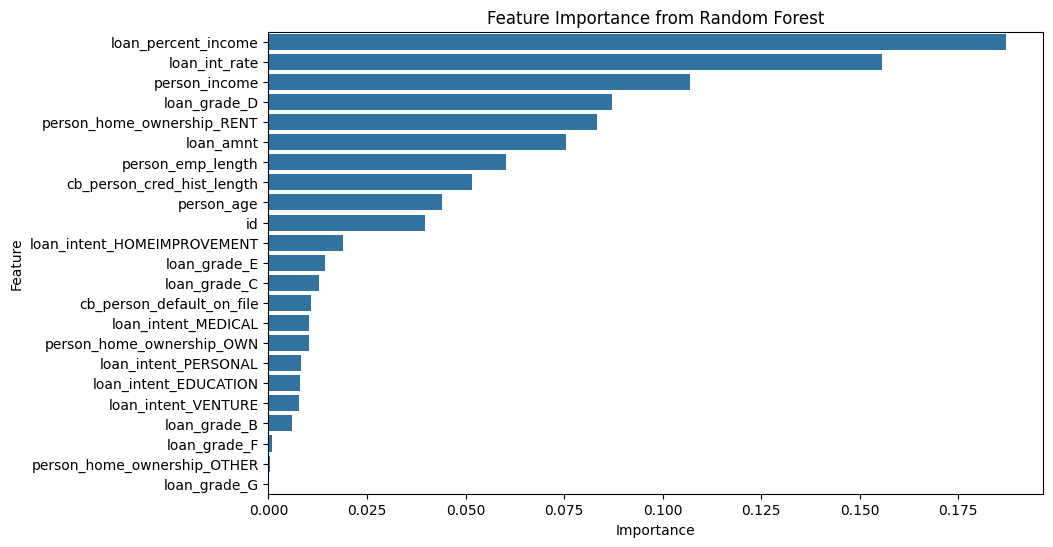

In [171]:
# Get the feature importances from the trained RandomForest model
feature_importances = rf.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()


# Preprocessing Testset for prediction

In [174]:
# Check the feature names in the training set after preprocessing
print("Training set features:")
print(X_train.columns)

# Check the feature names in the test set after preprocessing
print("Test set features:")
print(test_df.columns)

Training set features:
Index(['id', 'person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E',
       'loan_grade_F', 'loan_grade_G'],
      dtype='object')
Test set features:
Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')


In [175]:
# Apply One-Hot Encoding to the test set for the same columns
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade']
test_df = pd.get_dummies(test_df, columns=categorical_cols, drop_first=True)

print("Test set after One-Hot Encoding:")
print(test_df.columns)

Test set after One-Hot Encoding:
Index(['id', 'person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E',
       'loan_grade_F', 'loan_grade_G'],
      dtype='object')


In [176]:
# Align test set columns with training set columns
test_df = test_df.reindex(columns=X_train.columns, fill_value=0)

print("Test set after reindexing with training set columns:")
print(test_df.columns)

Test set after reindexing with training set columns:
Index(['id', 'person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E',
       'loan_grade_F', 'loan_grade_G'],
      dtype='object')


In [179]:
# Check unique values in the column 'cb_person_default_on_file'
print(test_df['cb_person_default_on_file'].unique())

['N' 'Y']


In [180]:
# Convert 'cb_person_default_on_file' from 'Y'/'N' to 1/0
test_df['cb_person_default_on_file'] = test_df['cb_person_default_on_file'].map({'Y': 1, 'N': 0})

# Check if the conversion worked
print(test_df['cb_person_default_on_file'].unique())

[0 1]


In [181]:
# Check data types in the test set to ensure everything is numeric
print(test_df.dtypes)

id                               int64
person_age                       int64
person_income                    int64
person_emp_length              float64
loan_amnt                        int64
loan_int_rate                  float64
loan_percent_income            float64
cb_person_default_on_file        int64
cb_person_cred_hist_length       int64
person_home_ownership_OTHER       bool
person_home_ownership_OWN         bool
person_home_ownership_RENT        bool
loan_intent_EDUCATION             bool
loan_intent_HOMEIMPROVEMENT       bool
loan_intent_MEDICAL               bool
loan_intent_PERSONAL              bool
loan_intent_VENTURE               bool
loan_grade_B                      bool
loan_grade_C                      bool
loan_grade_D                      bool
loan_grade_E                      bool
loan_grade_F                      bool
loan_grade_G                      bool
dtype: object


# Testing Predictions on the Testing data

In [182]:
# Logistic Regressionl to make predictions on the test set
test_predictions = logreg.predict_proba(test_df)[:, 1]  

# Prepare the submission file
submission_df = pd.DataFrame({
    'id': test_df['id'],
    'Loan_Status': test_predictions
})

# Save the submission file
submission_df.to_csv('final_submission.csv', index=False)

print("Submission file saved.")

Submission file saved.


In [183]:
# Use RandomForest to make predictions on the test set
test_predictions = rf.predict_proba(test_df)[:, 1]

# Prepare the submission file
submission_df = pd.DataFrame({
    'id': test_df['id'],
    'Loan_Status': test_predictions
})

# Save the submission file
submission_df.to_csv('final_submission_rf.csv', index=False)

print("Submission file saved as 'final_submission_rf.csv'")

Submission file saved as 'final_submission_rf.csv'
